In [13]:
import numpy as np
import torch
import torch.nn.functional as F

from analyst import Analyst
from config import ModelConfig, TrainerConfig
from dataset import load_dataset_manager

In [14]:
torch.manual_seed(24)
np.random.seed(24)

trainer_config = TrainerConfig(
    dataset_name="toydata", epochs=10, ignore_saved_model=True, load_model=False, batch_size=64
)
model_config = ModelConfig(d_model=64, lr=0.0001)

In [15]:
trainer_config

TrainerConfig(model_name='attentive2', dataset_name='toydata', epochs=10, batch_size=64, verbose=False, ignore_saved_model=True, load_model=False, save_model=True, load_dataset=True, save_dataset=True, cache_dir='cache/', dataset_dir='cache/dataset/')

In [16]:
model_config

ModelConfig(d_model=64, max_embedding_norm=None, window_size=8, negative_sample_size=5, lr=0.0001, use_learnable_embedding=True, dropout=0.1, add_seq_embedding=True, add_positional_encoding=False)

In [17]:
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

load cached dataset_manager from: cache/dataset/toydata.pickle


In [18]:
analyst = Analyst(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

In [19]:
def on_epoch_start():
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "M", "genre", method="attention", num_top_values=30
    )
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "F", "genre", method="attention", num_top_values=30
    )
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "M", "genre", method="inner-product", num_top_values=30
    )
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "F", "genre", method="inner-product", num_top_values=30
    )
    analyst.visualize_meta_embedding("gender", "genre", method="pca")
    print(analyst.trainer.model.embedding_seq_meta.weight[6], analyst.trainer.model.embedding_item_meta.weight[15])
    print(F.cosine_similarity(analyst.trainer.model.embedding_seq_meta.weight[6], analyst.trainer.model.embedding_seq_meta.weight[7], dim=0))

train start
similarity of seq meta: gender:M for meta: genre
0.0678 E5
0.0675 E1
0.0670 F2
0.0667 M3
0.0667 E3
0.0666 F4
0.0666 F3
0.0666 M5
0.0666 M4
0.0665 F5
0.0665 M2
0.0664 E2
0.0662 F1
0.0662 M1
0.0660 E4
similarity of seq meta: gender:F for meta: genre
0.0673 E4
0.0671 F4
0.0670 M4
0.0669 E3
0.0668 F5
0.0668 M1
0.0668 F3
0.0668 M5
0.0666 M2
0.0666 E2
0.0666 F1
0.0664 F2
0.0662 M3
0.0660 E1
0.0660 E5
similarity of seq meta: gender:M for meta: genre
0.0871 E5
0.0468 E1
-0.0134 F2
-0.0440 M3
-0.0482 E3
-0.0575 F4
-0.0577 F3
-0.0594 M5
-0.0606 M4
-0.0652 F5
-0.0728 M2
-0.0843 E2
-0.1026 F1
-0.1050 M1
-0.1303 E4
similarity of seq meta: gender:F for meta: genre
0.0869 E4
0.0600 F4
0.0514 M4
0.0354 E3
0.0251 F5
0.0226 M1
0.0175 F3
0.0165 M5
0.0033 M2
-0.0013 E2
-0.0069 F1
-0.0239 F2
-0.0485 M3
-0.0681 E1
-0.0777 E5


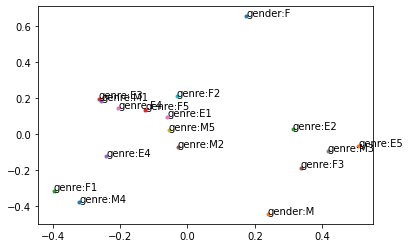

tensor([-0.0402, -0.2124, -0.0149,  0.1443,  0.1233, -0.1346, -0.0526, -0.0935,
         0.1679,  0.1884,  0.0092, -0.1835, -0.1284, -0.0765, -0.0065, -0.2521,
        -0.1617, -0.0079,  0.0824,  0.0556,  0.1404, -0.1311,  0.0439,  0.0101,
         0.2219, -0.0243, -0.0863, -0.1700,  0.2478,  0.0221, -0.0982, -0.0285,
        -0.0370, -0.0238,  0.1966,  0.0719, -0.1038, -0.1050,  0.1167, -0.0196,
        -0.0697,  0.0126,  0.1155,  0.0382,  0.0695, -0.0882, -0.0434, -0.0288,
        -0.0054,  0.0189, -0.0282,  0.1428, -0.2408, -0.0499,  0.0417, -0.0487,
         0.1078, -0.0028, -0.0576,  0.0883,  0.0636,  0.1230, -0.0545, -0.0539],
       grad_fn=<SelectBackward0>) tensor([-4.1644e-02,  1.8701e-01,  7.5970e-03, -1.3641e-01,  7.0909e-02,
        -1.0510e-01,  1.3620e-01, -8.4303e-02, -5.4572e-02, -3.4527e-02,
         4.9070e-02,  9.0391e-02, -1.9103e-01,  5.4365e-02,  1.8991e-04,
         5.8012e-02, -1.8272e-01,  2.5818e-02, -2.6153e-02,  6.9344e-02,
        -2.0749e-02,  1.0134e-01,

100%|██████████| 1688/1688 [00:02<00:00, 565.26it/s]


Epoch: 1, loss: 0.2854417162580202, test_loss: {'test': 0.27408947852126797}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.2201 F4
0.2135 F1
0.2038 F2
0.1499 F5
0.1477 F3
0.0157 E1
0.0141 E2
0.0123 E5
0.0121 E4
0.0108 E3
0.0000 M3
0.0000 M2
0.0000 M5
0.0000 M4
0.0000 M1
similarity of seq meta: gender:F for meta: genre
0.1947 F4
0.1835 F1
0.1733 F2
0.1487 F5
0.1414 F3
0.0349 E1
0.0328 E2
0.0315 E4
0.0294 E5
0.0282 E3
0.0004 M3
0.0004 M2
0.0004 M5
0.0004 M4
0.0003 M1
similarity of seq meta: gender:M for meta: genre
95.8255 F4
95.5828 F1
95.2103 F2
92.7559 F5
92.6355 F3
74.7000 E1
73.8409 E2
72.7462 E5
72.5880 E4
71.7102 E3
17.5641 M3
17.0206 M2
15.7532 M5
15.5136 M4
13.6057 M1
similarity of seq meta: gender:F for meta: genre
60.4878 F4
60.0148 F1
59.5561 F2
58.3361 F5
57.9280 F3
46.7345 E1
46.2522 E2
45.9054 E4
45.3734 E5
45.0185 E3
10.6702 M3
10.5250 M2
9.9240 M5
9.9235 M4
8.5703 M1


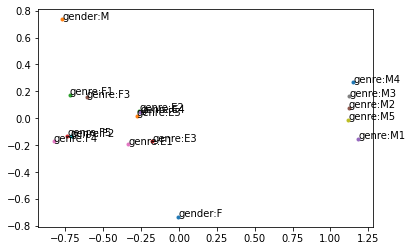

tensor([-0.2531, -0.0757, -0.1474,  0.3051,  0.3357, -0.3405, -0.2445, -0.2517,
         0.0277,  0.1482, -0.1264, -0.3226, -0.2722, -0.3069, -0.1813, -0.0648,
        -0.0123, -0.0865, -0.0736, -0.1143, -0.0333, -0.2074, -0.1818,  0.2276,
         0.0533,  0.1344,  0.1048, -0.0796,  0.0737, -0.1463,  0.0424,  0.1799,
        -0.2054,  0.1443,  0.4067,  0.2915,  0.0193, -0.2958,  0.3363,  0.1661,
         0.1332, -0.1361,  0.2934, -0.1626, -0.1218, -0.2510,  0.1333,  0.1324,
         0.1050, -0.1641, -0.2188,  0.3362, -0.3975, -0.2317,  0.2226,  0.0597,
         0.2878, -0.0777,  0.0690,  0.2780,  0.2266,  0.0012, -0.1840, -0.2548],
       grad_fn=<SelectBackward0>) tensor([-0.3417,  0.5174, -0.2881,  0.1423,  0.3944, -0.4164, -0.1473, -0.3824,
        -0.3776, -0.3335, -0.2474, -0.1890, -0.5131, -0.2531, -0.3020,  0.3752,
         0.0786, -0.2771, -0.3324, -0.2293, -0.3406, -0.1552, -0.3214,  0.3960,
        -0.1802,  0.2333,  0.4023,  0.2648, -0.5351, -0.2347,  0.1674,  0.4017,
     

100%|██████████| 1688/1688 [00:03<00:00, 562.18it/s]


Epoch: 2, loss: 0.2623870857768031, test_loss: {'test': 0.2726026997323285}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.2760 F4
0.1969 F1
0.1924 F3
0.1706 F2
0.1628 F5
0.0005 E1
0.0003 E2
0.0002 E5
0.0002 E4
0.0002 E3
0.0000 M3
0.0000 M4
0.0000 M2
0.0000 M5
0.0000 M1
similarity of seq meta: gender:F for meta: genre
0.2984 F4
0.1912 F1
0.1720 F3
0.1716 F5
0.1642 F2
0.0009 E1
0.0005 E2
0.0004 E5
0.0004 E4
0.0003 E3
0.0000 M3
0.0000 M4
0.0000 M2
0.0000 M5
0.0000 M1
similarity of seq meta: gender:M for meta: genre
214.9923 F4
212.2897 F1
212.1033 F3
211.1426 F2
210.7669 F5
164.2225 E1
160.2878 E2
158.5605 E5
156.3401 E4
155.6654 E3
16.6122 M3
11.5349 M4
9.3170 M2
7.3385 M5
4.0503 M1
similarity of seq meta: gender:F for meta: genre
193.3338 F4
189.7731 F1
188.9265 F3
188.9080 F5
188.5568 F2
146.5786 E1
142.9495 E2
141.0259 E5
140.0140 E4
138.9590 E3
13.1804 M3
9.4746 M4
7.0841 M2
5.3437 M5
2.4806 M1


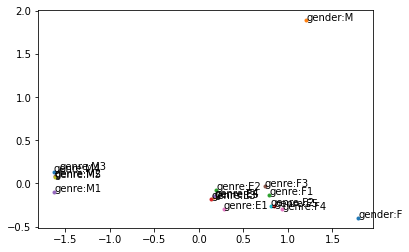

tensor([-0.5435,  0.0191, -0.3004,  0.5368,  0.6432, -0.6201, -0.4849, -0.4394,
        -0.0508,  0.3402, -0.2720, -0.4997, -0.3754, -0.5973, -0.4050,  0.1981,
         0.1845, -0.0768, -0.2358, -0.3117, -0.2750, -0.2364, -0.5083,  0.5125,
        -0.1497,  0.3383,  0.3570, -0.1517, -0.1381, -0.3647,  0.2218,  0.2751,
        -0.4304,  0.3574,  0.6872,  0.5950,  0.1559, -0.5682,  0.6434,  0.4358,
         0.3978, -0.3211,  0.5262, -0.4294, -0.4000, -0.4602,  0.3792,  0.3489,
         0.1434, -0.4326, -0.4851,  0.6308, -0.6212, -0.4606,  0.4667,  0.1738,
         0.5117,  0.0333,  0.1902,  0.5382,  0.4315,  0.2195, -0.2727, -0.5289],
       grad_fn=<SelectBackward0>) tensor([-0.3486,  0.5748, -0.2887,  0.0367,  0.4070, -0.4320, -0.0840, -0.3929,
        -0.3919, -0.3138, -0.2207, -0.1102, -0.5780, -0.2087, -0.2815,  0.3603,
        -0.0582, -0.2467, -0.3512, -0.1568, -0.3397, -0.0182, -0.3153,  0.4002,
        -0.1019,  0.1658,  0.4094,  0.3296, -0.5873, -0.1828,  0.0730,  0.4475,
     

100%|██████████| 1688/1688 [00:03<00:00, 554.18it/s]


Epoch: 3, loss: 0.2554079377686262, test_loss: {'test': 0.2663146154999168}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.3523 F4
0.2325 F3
0.1669 F2
0.1318 F1
0.1162 F5
0.0001 E1
0.0001 E5
0.0001 E2
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M4
0.0000 M2
0.0000 M5
0.0000 M1
similarity of seq meta: gender:F for meta: genre
0.4789 F4
0.1416 F3
0.1357 F2
0.1345 F5
0.1091 F1
0.0001 E1
0.0001 E5
0.0001 E2
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M4
0.0000 M2
0.0000 M5
0.0000 M1
similarity of seq meta: gender:M for meta: genre
266.7216 F4
263.3954 F3
260.7430 F2
258.8573 F1
257.8444 F5
201.7154 E1
200.0417 E5
198.3256 E2
194.6547 E4
192.0184 E3
42.3755 M3
38.6577 M4
32.3914 M2
28.5790 M5
25.5691 M1
similarity of seq meta: gender:F for meta: genre
242.3898 F4
232.6401 F3
232.2988 F2
232.2281 F5
230.5538 F1
175.1616 E1
171.0541 E5
169.8940 E2
167.5018 E4
164.8466 E3
20.4010 M3
18.0644 M4
11.8844 M2
9.0134 M5
6.9426 M1


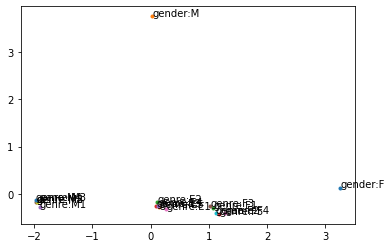

tensor([-0.8603, -0.1574, -0.3434,  0.6000,  1.0015, -0.8873, -0.7117, -0.4676,
         0.1067,  0.6626, -0.0979, -0.3984, -0.2378, -0.8962, -0.4981,  0.2427,
         0.3762,  0.2335, -0.2870, -0.2449, -0.4637,  0.0491, -0.8750,  0.7956,
        -0.1252,  0.5487,  0.5595, -0.2294, -0.1461, -0.5911,  0.2076,  0.2540,
        -0.4216,  0.4812,  0.9848,  0.9002,  0.0859, -0.8236,  0.9704,  0.7250,
         0.6614, -0.4018,  0.7770, -0.7091, -0.6357, -0.5408,  0.4936,  0.3053,
        -0.0772, -0.6453, -0.7798,  0.9474, -0.8396, -0.6318,  0.5039,  0.0545,
         0.7369,  0.3726,  0.2461,  0.6068,  0.6377,  0.4409, -0.1038, -0.8349],
       grad_fn=<SelectBackward0>) tensor([-3.7302e-01,  6.6396e-01, -3.1165e-01, -9.9447e-02,  4.4854e-01,
        -4.7366e-01,  7.7610e-03, -4.3114e-01, -4.4117e-01, -2.7097e-01,
        -2.1323e-01, -2.0874e-02, -6.7427e-01, -1.6126e-01, -2.8567e-01,
         3.6878e-01, -2.7227e-01, -2.1674e-01, -3.9711e-01, -7.7898e-02,
        -3.5813e-01,  2.1634e-01,

100%|██████████| 1688/1688 [00:02<00:00, 574.57it/s]


Epoch: 4, loss: 0.24293512670160497, test_loss: {'test': 0.250347162548329}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.1998 F3
0.1660 F4
0.1550 F2
0.1326 F1
0.0796 E5
0.0767 E1
0.0660 E2
0.0628 F5
0.0325 E4
0.0289 E3
0.0000 M3
0.0000 M4
0.0000 M2
0.0000 M5
0.0000 M1
similarity of seq meta: gender:F for meta: genre
0.5212 F4
0.1438 F5
0.1390 F2
0.1007 F1
0.0952 F3
0.0001 E1
0.0000 E5
0.0000 E2
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M4
0.0000 M2
0.0000 M5
0.0000 M1
similarity of seq meta: gender:M for meta: genre
207.9156 F3
206.4304 F4
205.8856 F2
204.6365 F1
200.5550 E5
200.2514 E1
199.0486 E2
198.6599 F5
193.3961 E4
192.4452 E3
133.9629 M3
132.8546 M4
128.5274 M2
122.3244 M5
113.6085 M1
similarity of seq meta: gender:F for meta: genre
247.0027 F4
236.7026 F5
236.4277 F2
233.8542 F1
233.4022 F3
174.0479 E1
166.5865 E5
163.4562 E2
159.3437 E4
157.7124 E3
15.5286 M3
12.1715 M4
8.0218 M2
7.0490 M5
1.7471 M1


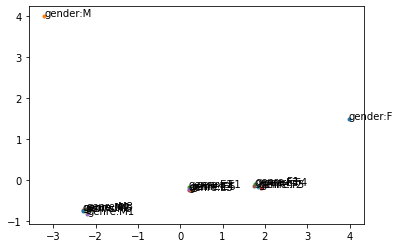

tensor([-1.1129, -0.3318, -0.2045,  0.5930,  1.3185, -1.0171, -0.8578, -0.3343,
         0.2606,  0.9138,  0.0823, -0.2478, -0.0741, -1.1537, -0.4700,  0.1912,
         0.5546,  0.4839, -0.0931, -0.1160, -0.4648,  0.3251, -1.1307,  0.9941,
         0.0717,  0.6990,  0.5207, -0.2930, -0.0159, -0.7598,  0.0132,  0.2281,
        -0.3194,  0.3815,  1.2181,  1.1183, -0.0312, -0.8921,  1.1308,  0.8856,
         0.8636, -0.3215,  0.9831, -0.9220, -0.5583, -0.5048,  0.4529,  0.2015,
        -0.2795, -0.6717, -0.9589,  1.0701, -0.8549, -0.6792,  0.4777, -0.1718,
         0.9089,  0.6524,  0.0761,  0.6165,  0.7131,  0.6069,  0.0597, -1.0907],
       grad_fn=<SelectBackward0>) tensor([-0.3932,  0.7350, -0.3313, -0.3157,  0.5032, -0.5365,  0.1756, -0.4915,
        -0.4860, -0.2203, -0.1973,  0.1219, -0.7648, -0.0771, -0.3163,  0.3894,
        -0.5910, -0.1569, -0.4610,  0.0489, -0.3645,  0.4483, -0.3596,  0.4878,
         0.1665, -0.0698,  0.4960,  0.5780, -0.7728, -0.0362, -0.2333,  0.6386,
     

100%|██████████| 1688/1688 [00:02<00:00, 577.49it/s]


Epoch: 5, loss: 0.23125542198627083, test_loss: {'test': 0.23083075049434792}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.3017 M4
0.2621 M3
0.2537 M2
0.1300 M5
0.0497 M1
0.0009 E2
0.0006 E5
0.0005 E1
0.0004 E4
0.0004 E3
0.0000 F3
0.0000 F2
0.0000 F1
0.0000 F4
0.0000 F5
similarity of seq meta: gender:F for meta: genre
0.4538 F4
0.2043 F2
0.1312 F5
0.1147 F3
0.0959 F1
0.0000 E1
0.0000 E5
0.0000 E2
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M5
0.0000 M4
0.0000 M2
0.0000 M1
similarity of seq meta: gender:M for meta: genre
261.1585 M4
260.0326 M3
259.7717 M2
254.4226 M5
246.7341 M1
214.8235 E2
211.6317 E5
209.1182 E1
208.2728 E4
207.3852 E3
114.5464 F3
112.4233 F2
111.2297 F1
111.1308 F4
102.8330 F5
similarity of seq meta: gender:F for meta: genre
271.5897 F4
265.2067 F2
261.6646 F5
260.5879 F3
259.1561 F1
176.3399 E1
168.9744 E5
168.2981 E2
162.6555 E4
160.0882 E3
-7.1930 M3
-11.1886 M5
-12.9630 M4
-13.1822 M2
-15.3444 M1


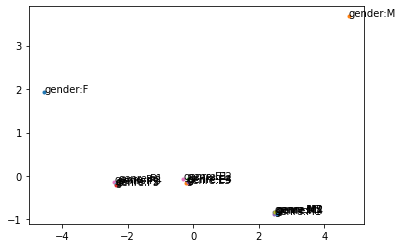

tensor([-1.2534, -0.4334, -0.1070,  0.6105,  1.5047, -1.1451, -0.9712, -0.2513,
         0.3687,  1.0584,  0.2161, -0.1470,  0.0635, -1.3508, -0.4769,  0.1759,
         0.6848,  0.6251,  0.0486, -0.0409, -0.4519,  0.4755, -1.2440,  1.1073,
         0.1809,  0.7618,  0.4462, -0.3373,  0.0913, -0.8627, -0.1064,  0.2341,
        -0.2400,  0.3008,  1.3779,  1.2363, -0.1121, -0.9615,  1.2053,  0.8960,
         1.0163, -0.3041,  1.1258, -1.0197, -0.4620, -0.4796,  0.4231,  0.1273,
        -0.4113, -0.6274, -1.0405,  1.1258, -0.8229, -0.7110,  0.4856, -0.3078,
         1.0537,  0.8147, -0.0436,  0.6589,  0.7988,  0.7112,  0.1760, -1.2591],
       grad_fn=<SelectBackward0>) tensor([-0.3742,  0.7658, -0.3262, -0.4610,  0.5325, -0.5864,  0.3120, -0.5520,
        -0.5326, -0.1790, -0.2070,  0.2083, -0.8246,  0.0054, -0.3657,  0.4140,
        -0.7705, -0.1189, -0.5227,  0.1263, -0.3243,  0.5729, -0.3694,  0.5438,
         0.2501, -0.1653,  0.5499,  0.6298, -0.8537,  0.0047, -0.3341,  0.6657,
     

100%|██████████| 1688/1688 [00:02<00:00, 570.72it/s]


Epoch: 6, loss: 0.2263944065352398, test_loss: {'test': 0.2249194910546756}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.3404 M4
0.2940 M3
0.1681 M5
0.1544 M2
0.0431 M1
0.0000 E2
0.0000 E5
0.0000 E1
0.0000 E3
0.0000 E4
0.0000 F4
0.0000 F3
0.0000 F2
0.0000 F1
0.0000 F5
similarity of seq meta: gender:F for meta: genre
0.4401 F4
0.1881 F2
0.1442 F5
0.1310 F3
0.0966 F1
0.0000 E1
0.0000 E5
0.0000 E2
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M5
0.0000 M4
0.0000 M2
0.0000 M1
similarity of seq meta: gender:M for meta: genre
327.3522 M4
326.1793 M3
321.7093 M5
321.0270 M2
310.8114 M1
233.4330 E2
230.8196 E5
228.8674 E1
227.9973 E3
225.8031 E4
75.4443 F4
74.1208 F3
71.4617 F2
69.0639 F1
66.0806 F5
similarity of seq meta: gender:F for meta: genre
299.4695 F4
292.6672 F2
290.5443 F5
289.7766 F3
287.3389 F1
177.6027 E1
171.3161 E5
171.1534 E2
163.1965 E4
162.3608 E3
-30.1413 M3
-34.2079 M5
-36.4149 M4
-40.3008 M2
-41.2096 M1


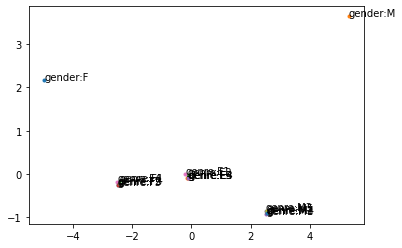

tensor([-1.3487, -0.4695, -0.0968,  0.6286,  1.5820, -1.2376, -1.0674, -0.2348,
         0.4370,  1.1364,  0.2897, -0.0873,  0.1205, -1.4643, -0.4968,  0.1758,
         0.7597,  0.6924,  0.0689,  0.0047, -0.4562,  0.5354, -1.3106,  1.1963,
         0.2058,  0.8334,  0.4515, -0.3773,  0.1257, -0.9546, -0.1486,  0.2189,
        -0.1971,  0.2915,  1.4868,  1.2992, -0.1405, -1.0207,  1.2627,  0.9315,
         1.1276, -0.3091,  1.2136, -1.0925, -0.4492, -0.4746,  0.4230,  0.0864,
        -0.4860, -0.6300, -1.1192,  1.1869, -0.8611, -0.7621,  0.4888, -0.3576,
         1.1638,  0.8980, -0.0587,  0.6847,  0.8552,  0.7901,  0.2457, -1.3743],
       grad_fn=<SelectBackward0>) tensor([-0.3408,  0.7700, -0.3114, -0.4956,  0.5443, -0.6092,  0.3513, -0.5672,
        -0.5676, -0.1527, -0.2165,  0.2315, -0.8240,  0.0241, -0.4029,  0.4287,
        -0.8057, -0.0974, -0.5345,  0.1483, -0.2853,  0.6172, -0.3604,  0.5587,
         0.2741, -0.1817,  0.5617,  0.6225, -0.8995,  0.0035, -0.3574,  0.6682,
     

100%|██████████| 1688/1688 [00:02<00:00, 572.97it/s]


Epoch: 7, loss: 0.2248009094685972, test_loss: {'test': 0.22323587616261148}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.3370 M4
0.2597 M3
0.2174 M5
0.1349 M2
0.0510 M1
0.0000 E2
0.0000 E5
0.0000 E1
0.0000 E3
0.0000 E4
0.0000 F4
0.0000 F3
0.0000 F2
0.0000 F1
0.0000 F5
similarity of seq meta: gender:F for meta: genre
0.4210 F4
0.1928 F2
0.1523 F3
0.1340 F5
0.0998 F1
0.0000 E1
0.0000 E2
0.0000 E5
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M5
0.0000 M4
0.0000 M2
0.0000 M1
similarity of seq meta: gender:M for meta: genre
354.6640 M4
352.5793 M3
351.1576 M5
347.3398 M2
339.5642 M1
230.9375 E2
229.8564 E5
229.5426 E1
227.5013 E3
223.8546 E4
48.2102 F4
46.4182 F3
43.2030 F2
40.4505 F1
39.1222 F5
similarity of seq meta: gender:F for meta: genre
315.8941 F4
309.6446 F2
307.7614 F3
306.7382 F5
304.3795 F1
178.0573 E1
170.8001 E2
170.1793 E5
162.3515 E4
161.4593 E3
-42.4818 M3
-46.4823 M5
-48.8660 M4
-53.2611 M2
-54.8862 M1


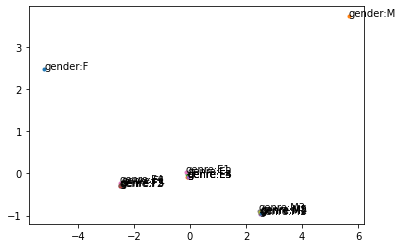

tensor([-1.4222, -0.4646, -0.1198,  0.6446,  1.6341, -1.3138, -1.1474, -0.2449,
         0.4573,  1.1622,  0.3070, -0.0738,  0.1260, -1.5266, -0.5310,  0.1900,
         0.8130,  0.7094,  0.0531,  0.0137, -0.4824,  0.5518, -1.3686,  1.2686,
         0.1929,  0.9101,  0.4891, -0.4119,  0.1138, -1.0477, -0.1461,  0.1985,
        -0.2009,  0.3061,  1.5546,  1.3443, -0.1333, -1.0710,  1.3165,  0.9789,
         1.2136, -0.3366,  1.2825, -1.1632, -0.4805, -0.4910,  0.4446,  0.0936,
        -0.5088, -0.6525, -1.1972,  1.2495, -0.9200, -0.8373,  0.4915, -0.3537,
         1.2463,  0.9288, -0.0324,  0.7030,  0.9072,  0.8434,  0.2663, -1.4666],
       grad_fn=<SelectBackward0>) tensor([-0.3280,  0.7593, -0.3031, -0.5029,  0.5473, -0.6162,  0.3557, -0.5654,
        -0.5765, -0.1397, -0.2194,  0.2405, -0.8123,  0.0227, -0.4191,  0.4302,
        -0.8036, -0.0892, -0.5326,  0.1599, -0.2648,  0.6285, -0.3520,  0.5604,
         0.2797, -0.1746,  0.5576,  0.6106, -0.9083, -0.0030, -0.3602,  0.6593,
     

100%|██████████| 1688/1688 [00:02<00:00, 575.18it/s]


Epoch: 8, loss: 0.22395861211593118, test_loss: {'test': 0.22238412474710229}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.3753 M4
0.2488 M5
0.1749 M3
0.1407 M2
0.0603 M1
0.0000 E2
0.0000 E1
0.0000 E5
0.0000 E3
0.0000 E4
0.0000 F4
0.0000 F3
0.0000 F2
0.0000 F1
0.0000 F5
similarity of seq meta: gender:F for meta: genre
0.3593 F4
0.2232 F2
0.1679 F3
0.1501 F5
0.0996 F1
0.0000 E1
0.0000 E2
0.0000 E5
0.0000 E4
0.0000 E3
0.0000 M3
0.0000 M5
0.0000 M4
0.0000 M1
0.0000 M2
similarity of seq meta: gender:M for meta: genre
368.9820 M4
365.6920 M5
362.8710 M3
361.1304 M2
354.3581 M1
224.1499 E2
223.2186 E1
223.1340 E5
219.2593 E3
216.5636 E4
30.3961 F4
28.2955 F3
24.5252 F2
20.8181 F1
20.6846 F5
similarity of seq meta: gender:F for meta: genre
327.9038 F4
324.0945 F2
321.8185 F3
320.9219 F5
317.6413 F1
176.7702 E1
172.9320 E2
170.6179 E5
161.2599 E4
160.4901 E3
-49.7660 M3
-52.9960 M5
-56.3142 M4
-61.8717 M1
-62.6635 M2


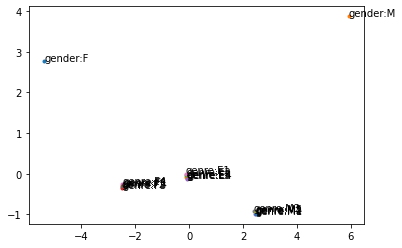

tensor([-1.4842e+00, -4.4963e-01, -1.4959e-01,  6.6294e-01,  1.6883e+00,
        -1.3911e+00, -1.2209e+00, -2.6536e-01,  4.6036e-01,  1.1738e+00,
         3.0760e-01, -7.7064e-02,  1.1765e-01, -1.5767e+00, -5.7553e-01,
         2.1928e-01,  8.6096e-01,  7.1376e-01,  2.9871e-02,  8.7382e-03,
        -5.1639e-01,  5.5941e-01, -1.4269e+00,  1.3333e+00,  1.7185e-01,
         9.8679e-01,  5.3643e-01, -4.4023e-01,  8.8606e-02, -1.1451e+00,
        -1.3300e-01,  1.8545e-01, -2.2118e-01,  3.2814e-01,  1.6099e+00,
         1.3869e+00, -1.1579e-01, -1.1304e+00,  1.3760e+00,  1.0312e+00,
         1.2879e+00, -3.7388e-01,  1.3443e+00, -1.2271e+00, -5.2707e-01,
        -5.1502e-01,  4.7893e-01,  1.2201e-01, -5.1588e-01, -6.8291e-01,
        -1.2762e+00,  1.3129e+00, -9.8528e-01, -9.1889e-01,  4.9961e-01,
        -3.3874e-01,  1.3155e+00,  9.4491e-01,  1.6205e-03,  7.2885e-01,
         9.6244e-01,  8.8141e-01,  2.6900e-01, -1.5486e+00],
       grad_fn=<SelectBackward0>) tensor([-0.3224,  0.7498, -0.

100%|██████████| 1688/1688 [00:03<00:00, 534.58it/s]


Epoch: 9, loss: 0.2230958543523268, test_loss: {'test': 0.22187093230432245}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.4630 M4
0.2768 M5
0.1106 M3
0.0931 M2
0.0566 M1
0.0000 E1
0.0000 E5
0.0000 E2
0.0000 E4
0.0000 E3
0.0000 F4
0.0000 F3
0.0000 F2
0.0000 F5
0.0000 F1
similarity of seq meta: gender:F for meta: genre
0.4224 F4
0.1835 F2
0.1537 F3
0.1409 F5
0.0995 F1
0.0000 E1
0.0000 E2
0.0000 E5
0.0000 E4
0.0000 E3
0.0000 M5
0.0000 M3
0.0000 M4
0.0000 M1
0.0000 M2
similarity of seq meta: gender:M for meta: genre
381.1697 M4
377.0523 M5
369.7113 M3
368.3356 M2
364.3484 M1
216.1543 E1
216.0460 E5
215.8629 E2
210.3767 E4
209.7041 E3
15.5177 F4
13.4074 F3
9.0822 F2
6.1754 F5
5.6905 F1
similarity of seq meta: gender:F for meta: genre
340.6143 F4
333.9459 F2
332.5280 F3
331.8296 F5
329.0450 F1
176.9807 E1
173.3292 E2
172.1022 E5
162.2685 E4
159.2677 E3
-54.2761 M5
-55.9792 M3
-59.9134 M4
-65.2371 M1
-69.6010 M2


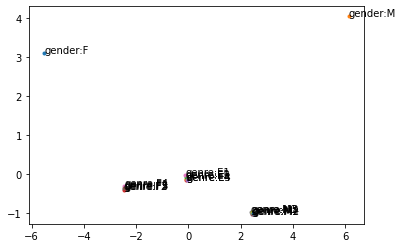

tensor([-1.5417, -0.4281, -0.1798,  0.6891,  1.7473, -1.4748, -1.2890, -0.2888,
         0.4536,  1.1813,  0.3009, -0.0892,  0.1048, -1.6277, -0.6300,  0.2632,
         0.9120,  0.7136,  0.0058, -0.0082, -0.5581,  0.5649, -1.4891,  1.3916,
         0.1470,  1.0639,  0.5890, -0.4619,  0.0566, -1.2432, -0.1138,  0.1814,
        -0.2523,  0.3514,  1.6627,  1.4300, -0.0955, -1.2007,  1.4422,  1.0895,
         1.3595, -0.4238,  1.4023, -1.2884, -0.5795, -0.5444,  0.5213,  0.1622,
        -0.5163, -0.7212, -1.3546,  1.3832, -1.0540, -1.0050,  0.5175, -0.3206,
         1.3801,  0.9569,  0.0386,  0.7646,  1.0222,  0.9106,  0.2641, -1.6253],
       grad_fn=<SelectBackward0>) tensor([-0.3181,  0.7412, -0.3021, -0.5061,  0.5454, -0.6326,  0.3653, -0.5608,
        -0.5746, -0.1306, -0.2131,  0.2519, -0.7978,  0.0249, -0.4463,  0.4343,
        -0.7917, -0.0846, -0.5240,  0.1761, -0.2550,  0.6344, -0.3379,  0.5602,
         0.2834, -0.1589,  0.5546,  0.5939, -0.9099, -0.0058, -0.3626,  0.6443,
     

100%|██████████| 1688/1688 [00:03<00:00, 559.40it/s]


Epoch: 10, loss: 0.222569536642371, test_loss: {'test': 0.2213498374879784}
saved best model to cache/best-toydata-attentive2.pt
train end
saved model to cache/toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
0.3894 M5
0.3401 M4
0.1367 M3
0.0782 M2
0.0556 M1
0.0000 E1
0.0000 E5
0.0000 E2
0.0000 E3
0.0000 E4
0.0000 F3
0.0000 F4
0.0000 F2
0.0000 F1
0.0000 F5
similarity of seq meta: gender:F for meta: genre
0.3613 F4
0.2492 F2
0.1802 F3
0.1241 F5
0.0852 F1
0.0000 E1
0.0000 E2
0.0000 E5
0.0000 E4
0.0000 E3
0.0000 M5
0.0000 M3
0.0000 M4
0.0000 M1
0.0000 M2
similarity of seq meta: gender:M for meta: genre
383.7295 M5
382.6461 M4
375.3567 M3
370.8889 M2
368.1544 M1
210.1033 E1
208.6219 E5
205.2438 E2
204.0206 E3
202.4401 E4
5.0338 F3
2.7812 F4
1.2843 F2
-5.7811 F1
-5.8590 F5
similarity of seq meta: gender:F for meta: genre
347.3388 F4
344.3675 F2
341.7740 F3
338.7932 F5
335.7778 F1
178.1396 E1
171.0923 E2
170.2012 E5
162.1952 E4
159.2723 E3
-56.1619 M5
-59.3635 M3
-64.74

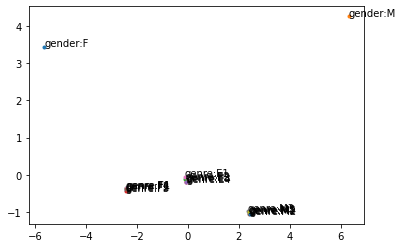

tensor([-1.5922, -0.4083, -0.2078,  0.7212,  1.8035, -1.5534, -1.3509, -0.3135,
         0.4447,  1.1857,  0.2909, -0.1054,  0.0906, -1.6734, -0.6844,  0.3098,
         0.9625,  0.7121, -0.0174, -0.0298, -0.5974,  0.5675, -1.5477,  1.4451,
         0.1218,  1.1433,  0.6421, -0.4775,  0.0245, -1.3436, -0.0918,  0.1806,
        -0.2859,  0.3744,  1.7084,  1.4697, -0.0749, -1.2729,  1.5067,  1.1468,
         1.4200, -0.4748,  1.4616, -1.3401, -0.6325, -0.5727,  0.5657,  0.2050,
        -0.5125, -0.7587, -1.4308,  1.4506, -1.1228, -1.0879,  0.5415, -0.2973,
         1.4415,  0.9645,  0.0747,  0.8027,  1.0806,  0.9344,  0.2563, -1.6970],
       grad_fn=<SelectBackward0>) tensor([-0.3081,  0.7267, -0.2992, -0.5087,  0.5346, -0.6359,  0.3742, -0.5572,
        -0.5663, -0.1268, -0.2056,  0.2588, -0.7922,  0.0317, -0.4602,  0.4318,
        -0.7857, -0.0815, -0.5180,  0.1853, -0.2464,  0.6371, -0.3253,  0.5579,
         0.2824, -0.1469,  0.5555,  0.5825, -0.9053, -0.0073, -0.3661,  0.6247,
     

In [20]:
analyst.fit(show_fig=False, on_epoch_start=on_epoch_start)
on_epoch_start()